In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

#consider the two dataset coffee_full and coffee_red, notice second dataset is just a subset of first
coffee_full = pd.read_csv('C:\.data\coffee_dataset.csv')
coffee_red = coffee_full.sample(200)

In the previous exercise, we saw how we could build a confidence interval for the population mean of __cofee-drinkers__. To get some practice, you will do the same process to create a confidence interval for the population mean height of __non-coffee drinkers__.

In [121]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [122]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [123]:
coffee_full.shape

(2974, 4)

In [124]:
coffee_red.shape

(200, 4)

#### Proportion of sample that doesnt drink cofee

In [125]:
##lets calculate how many not drink coffee in our smaller dataset
dont_drink_cofee = 1 - coffee_red.drinks_coffee.mean()
dont_drink_cofee

0.405

#### Average height for sample members that do not drink cofee

In [126]:
#calculate the average height of individual who do not drink coffee in our smaller dataset
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.78492279927877

In [127]:
#now lets bootstrap from the smaller data set to build confidence interval
#The replace=True portion will allow us to select again from array.
bootsample = coffee_red.sample(200, replace = True)
bootsample[bootsample['drinks_coffee'] == False]['height'].mean()

66.28588551349722

In [128]:
boot_mean = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace = True)
    boot_mean.append(bootsample[bootsample['drinks_coffee'] == False]['height'].mean())

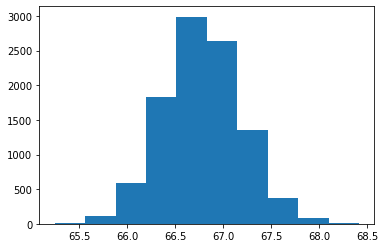

In [129]:
plt.hist(boot_mean);

#### Lover bound and upper bound of 95% confidence interval for the mean height of those who do not drink coffee in population

In [130]:
np.percentile(boot_mean, 2.5), np.percentile(boot_mean, 97.5)

(65.9929132815752, 67.58402738281573)

#### The value for the mean height of those who do not drink coffee in your actulal population ( coffee_full)

In [131]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()

66.44340776214705